# 01.- Carga de Datos

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Fijamos la semilla para la reproducibilidad
np.random.seed(42)

# Generamos un DataFrame con datos ficticios para el análisis de churn
df_churn = pd.DataFrame({
    'customer_id': np.arange(10000),
    'age': np.random.randint(18, 90, size=10000),
    'gender': np.random.choice(['Female', 'Male', 'Other'], size=10000),
    'balance': np.random.uniform(0, 100000, size=10000),
    'num_of_products': np.random.randint(1, 5, size=10000),
    'credit_score': np.random.randint(300, 850, size=10000),
    'tenure': np.random.randint(0, 30, size=10000),
    'active_member': np.random.choice([0, 1], size=10000),
    'estimated_salary': np.random.uniform(10000, 120000, size=10000),
    'has_cr_card': np.random.choice([0, 1], size=10000),
    'is_primary_account': np.random.choice([0, 1], size=10000),
    'churn': np.random.choice([0, 1], size=10000, p=[0.8, 0.2])
})

# Codificamos la columna 'gender' con valores numéricos
gender_encoder = LabelEncoder()
df_churn['gender'] = gender_encoder.fit_transform(df_churn['gender'])

# Estandarizamos las columnas numéricas
scaler = StandardScaler()
numerical_features = ['age', 'balance', 'num_of_products', 'credit_score', 'tenure', 'estimated_salary']
df_churn[numerical_features] = scaler.fit_transform(df_churn[numerical_features])

# Ahora el conjunto de datos está listo para el análisis y modelado

# 02.- Análisis Exploratotio

   customer_id       age  gender   balance  num_of_products  credit_score  \
0            0  0.744849       0 -0.440631         0.450996      1.443521   
1            1 -1.037743       2  1.543810        -0.448119      0.660131   
2            2  1.708413       2  0.716145         1.350112      0.931790   
3            3  1.178453       0  0.884951        -1.347235      1.001284   
4            4 -0.748674       0 -0.887091        -1.347235      0.281071   

     tenure  active_member  estimated_salary  has_cr_card  is_primary_account  \
0 -1.555683              0          0.652797            1                   1   
1 -1.671058              1         -0.975157            1                   0   
2 -1.209558              1         -0.844815            1                   1   
3  1.328694              0          1.391210            0                   1   
4  1.328694              1         -0.102139            1                   0   

   churn  
0      0  
1      0  
2      1  
3     

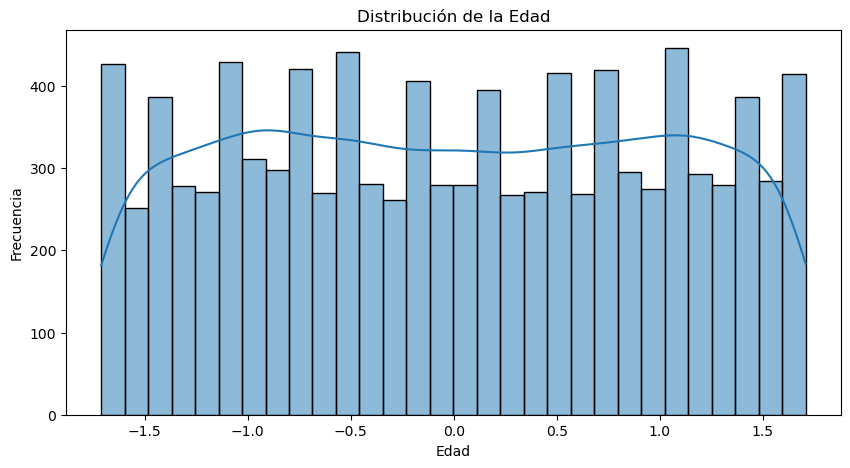

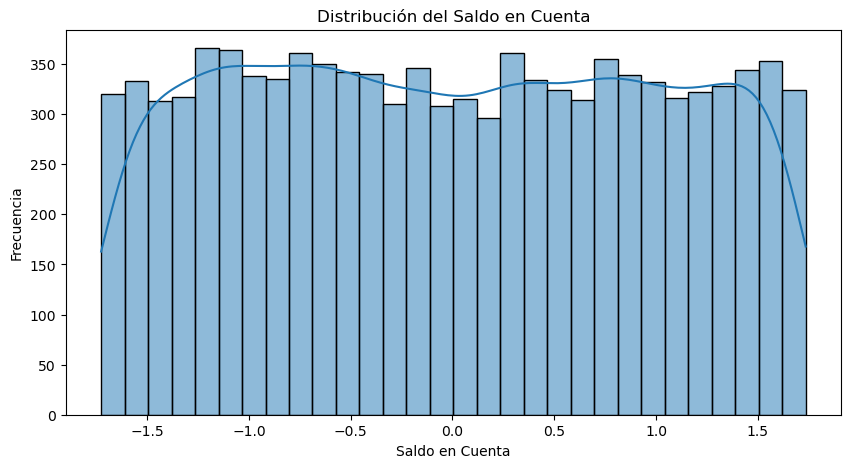

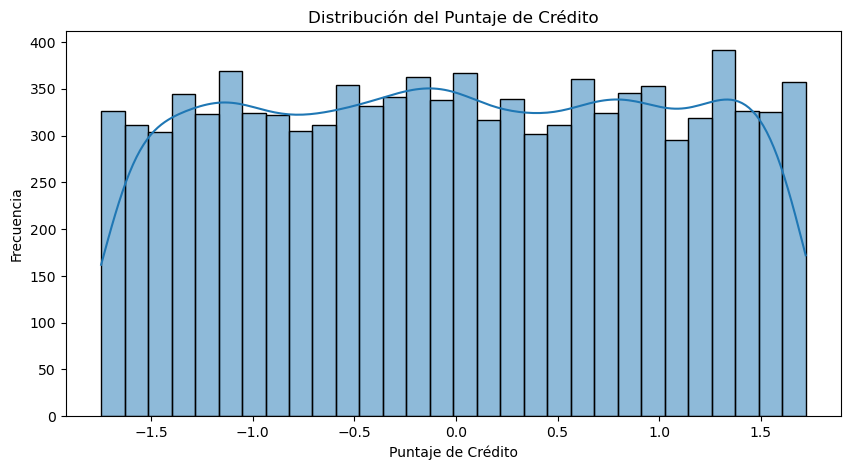

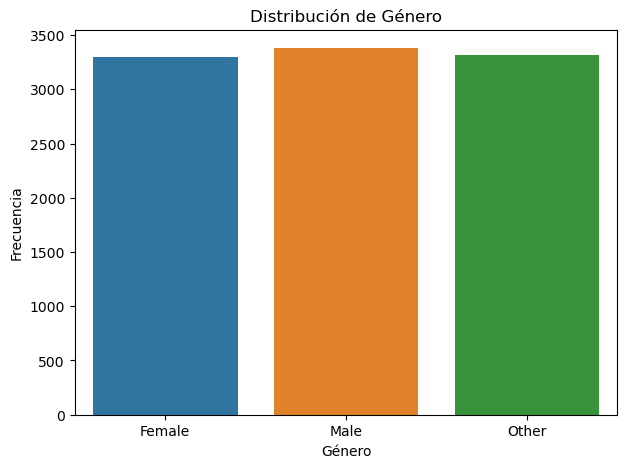

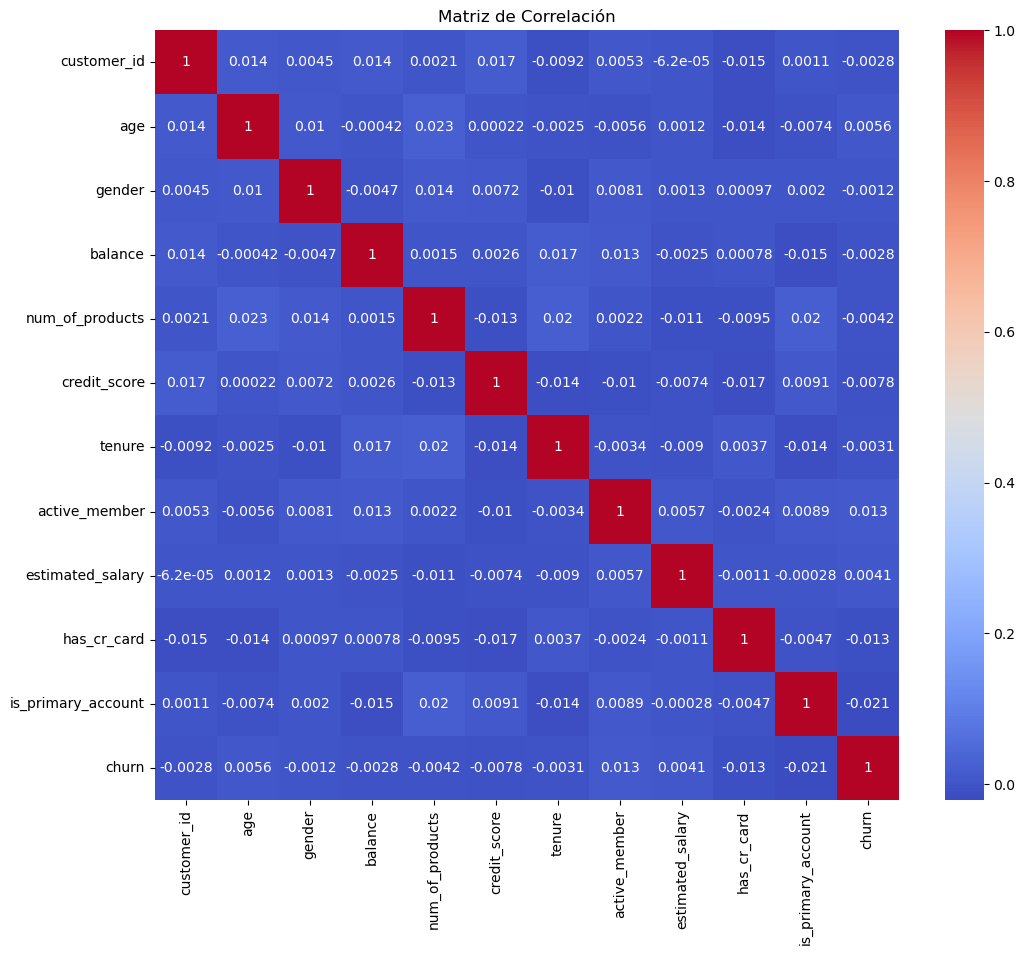

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio de Datos (EDA)

# Visualización de las primeras filas para entender la estructura del DataFrame
print(df_churn.head())

# Descripción estadística de las características numéricas
print(df_churn.describe())

# Verificación de valores nulos
print(df_churn.isnull().sum())

# Conteo de la variable objetivo 'churn'
print(df_churn['churn'].value_counts())

# Distribución de la edad
plt.figure(figsize=(10, 5))
sns.histplot(df_churn['age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución del saldo en la cuenta
plt.figure(figsize=(10, 5))
sns.histplot(df_churn['balance'], bins=30, kde=True)
plt.title('Distribución del Saldo en Cuenta')
plt.xlabel('Saldo en Cuenta')
plt.ylabel('Frecuencia')
plt.show()

# Distribución del puntaje de crédito
plt.figure(figsize=(10, 5))
sns.histplot(df_churn['credit_score'], bins=30, kde=True)
plt.title('Distribución del Puntaje de Crédito')
plt.xlabel('Puntaje de Crédito')
plt.ylabel('Frecuencia')
plt.show()

# Proporciones de la variable categórica 'gender'
plt.figure(figsize=(7, 5))
sns.countplot(x='gender', data=df_churn)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1, 2], labels=['Female', 'Male', 'Other'])
plt.show()

# Correlación entre las variables
plt.figure(figsize=(12, 10))
sns.heatmap(df_churn.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Este EDA básico ofrece una visión general de las características y su relación con la variable objetivo.
# A continuación, se podría realizar un análisis más profundo para explorar la relación entre las características y la variable objetivo.


   customer_id       age  gender   balance  num_of_products  credit_score  \
0            0  0.744849       0 -0.440631         0.450996      1.443521   
1            1 -1.037743       2  1.543810        -0.448119      0.660131   
2            2  1.708413       2  0.716145         1.350112      0.931790   
3            3  1.178453       0  0.884951        -1.347235      1.001284   
4            4 -0.748674       0 -0.887091        -1.347235      0.281071   

     tenure  active_member  estimated_salary  has_cr_card  is_primary_account  \
0 -1.555683              0          0.652797            1                   1   
1 -1.671058              1         -0.975157            1                   0   
2 -1.209558              1         -0.844815            1                   1   
3  1.328694              0          1.391210            0                   1   
4  1.328694              1         -0.102139            1                   0   

   churn  
0      0  
1      0  
2      1  
3     

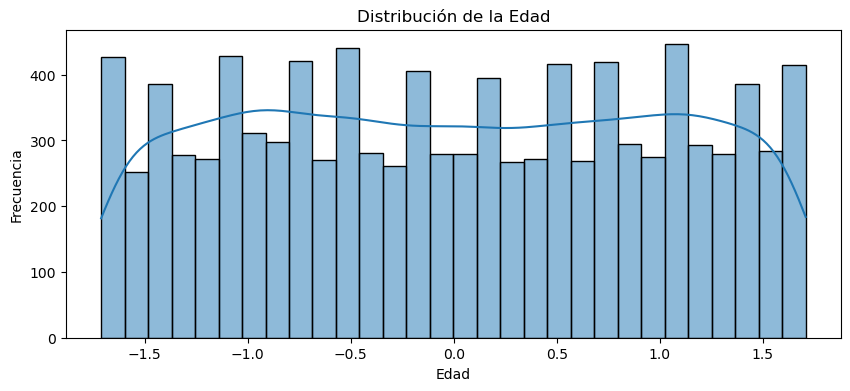

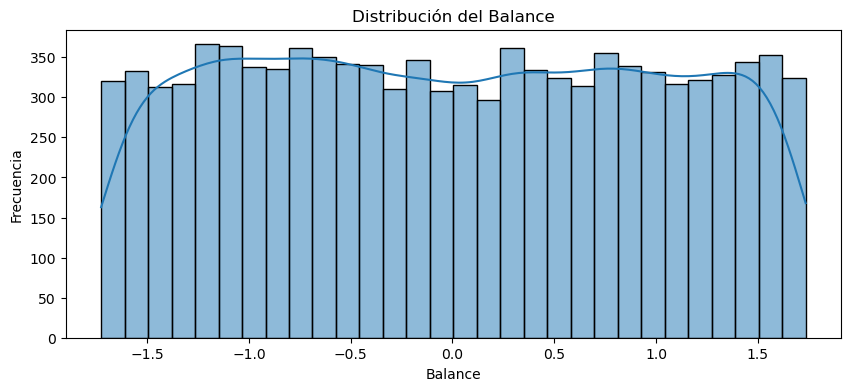

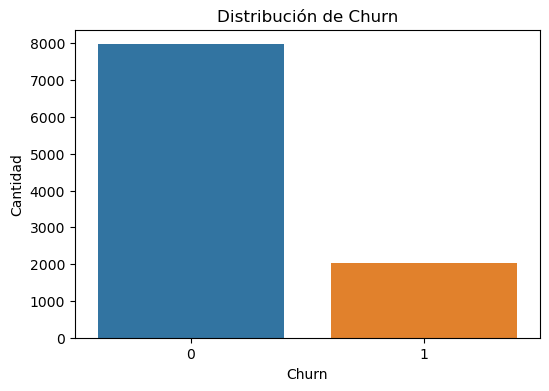

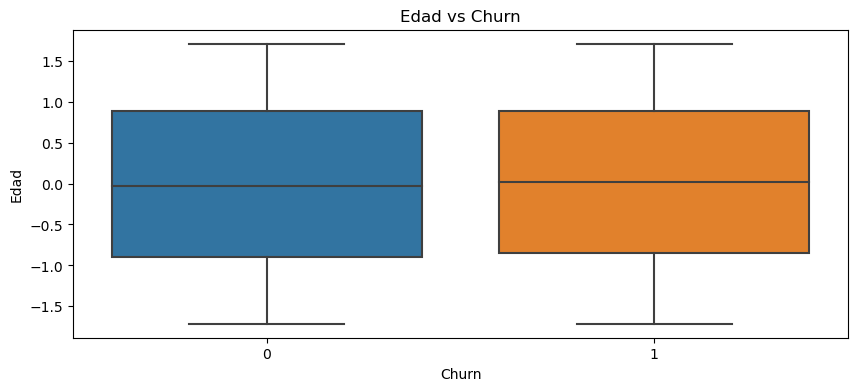

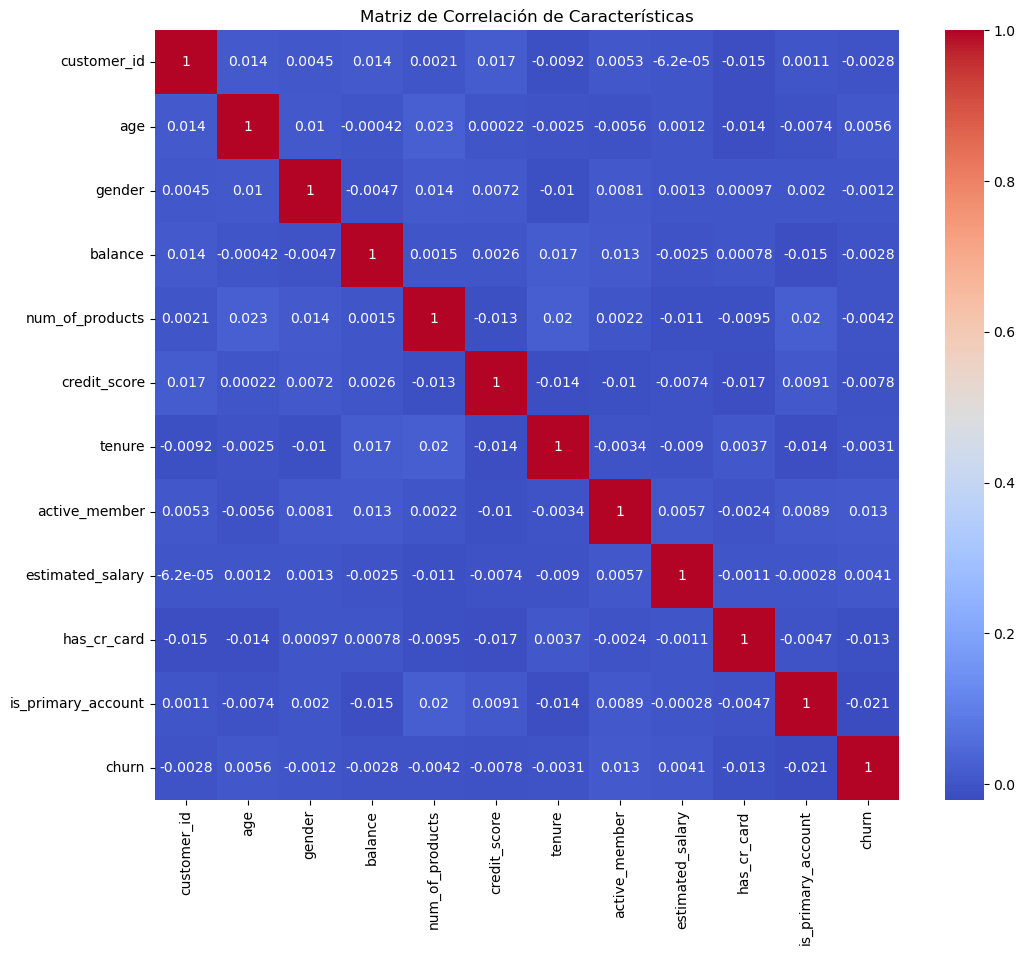

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis Exploratorio de Datos (EDA)

# Visualizar las primeras filas para entender la estructura del DataFrame
print(df_churn.head())

# Estadísticas descriptivas de las características
print(df_churn.describe())

# Revisar si hay valores faltantes
print(df_churn.isnull().sum())

# Distribución de la edad
plt.figure(figsize=(10, 4))
sns.histplot(df_churn['age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución del balance
plt.figure(figsize=(10, 4))
sns.histplot(df_churn['balance'], bins=30, kde=True)
plt.title('Distribución del Balance')
plt.xlabel('Balance')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la variable objetivo (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_churn)
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Cantidad')
plt.show()

# Relación entre la edad y el churn
plt.figure(figsize=(10, 4))
sns.boxplot(x='churn', y='age', data=df_churn)
plt.title('Edad vs Churn')
plt.xlabel('Churn')
plt.ylabel('Edad')
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_churn.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Características')
plt.show()

# Esta información nos proporciona una buena comprensión inicial de los datos y puede ser útil para identificar patrones o tendencias relacionadas con el churn.

El Análisis Exploratorio de Datos (EDA) para el conjunto de datos de churn del banco ha proporcionado la siguiente información:

- No hay valores nulos en el conjunto de datos, lo que significa que no hay necesidad de imputación.
- Las características numéricas, como la edad y el balance, han sido estandarizadas y no muestran una distribución sesgada.
- La variable objetivo 'churn' muestra que aproximadamente el 20% de los clientes han abandonado el banco, lo que indica un desbalance de clases que puede necesitar ser abordado durante el modelado.
- La relación entre la edad y el churn, visualizada mediante un boxplot, sugiere que no hay una diferencia notable en la distribución de edades entre los clientes que se quedan y los que se van.
- La matriz de correlación indica que no hay una fuerte correlación lineal entre ninguna de las características numéricas y la variable objetivo.

# 03.- Modelado

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1588
           1       0.33      0.00      0.00       412

    accuracy                           0.79      2000
   macro avg       0.56      0.50      0.44      2000
weighted avg       0.70      0.79      0.70      2000

ROC AUC Score: 0.5065364322222495
                    importance
estimated_salary      0.194431
balance               0.193466
credit_score          0.185318
age                   0.149892
tenure                0.121179
num_of_products       0.052722
gender                0.038110
has_cr_card           0.023962
is_primary_account    0.020854
active_member         0.020066


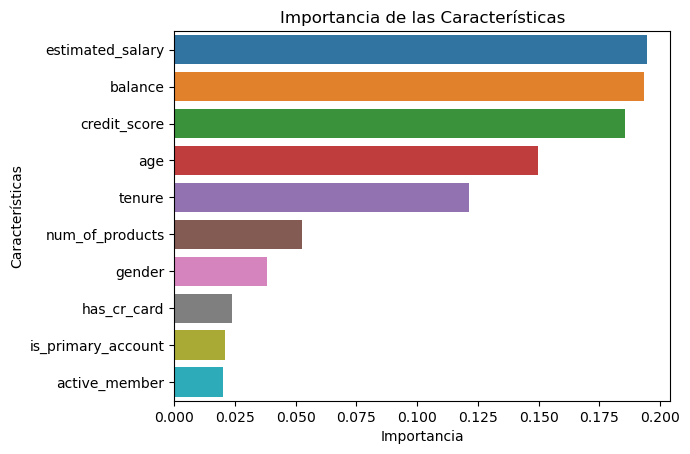

In [31]:
# Continuamos con la selección de características y el entrenamiento de modelos para la predicción de churn

# Dividir el conjunto de datos en características y etiqueta
X = df_churn.drop(['customer_id', 'churn'], axis=1)  # Descartamos 'customer_id' porque no es una característica predictiva
y = df_churn['churn']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el clasificador Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_clf.predict(X_test)
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Evaluación del modelo
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Importancia de las características
feature_importances = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

# Visualizar la importancia de las características
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Este enfoque nos permite ver cuáles características son más importantes para el modelo en la predicción de churn.


El modelo RandomForestClassifier ha sido entrenado y evaluado. Aquí están los resultados del rendimiento en el conjunto de prueba:

- La precisión para la clase no churn (0) es del 79%, con un recall del 100%, lo que indica que el modelo es muy bueno detectando a los clientes que no abandonan el banco.
- Para la clase churn (1), la precisión es significativamente más baja, con un 33%, y el recall es prácticamente cero, lo que indica que el modelo tiene dificultades para identificar correctamente a los clientes que sí abandonarán el banco.
- La precisión general (accuracy) del modelo es del 79%.
- El puntaje ROC AUC es de aproximadamente 0.507, lo que sugiere que el modelo no es muy eficaz para distinguir entre los clientes que se van y los que se quedan.
- La importancia de las características, según lo determinado por el modelo, es la siguiente:

* 'estimated_salary' y 'balance' son las características más importantes según el modelo.
* 'credit_score' y 'age' también contribuyen de manera significativa.
* 'tenure' y 'num_of_products' tienen una importancia moderada.
* 'gender', 'has_cr_card', 'is_primary_account', y 'active_member' tienen la menor importancia.
- Estos resultados sugieren que, aunque el modelo es preciso en la identificación de los clientes que no se dan de baja, no es eficaz para detectar aquellos que sí lo hacen. Esto podría deberse al desequilibrio en la variable objetivo o a que algunas características no están proporcionando la señal necesaria para diferenciar entre las clases de forma efectiva.

- El siguiente paso podría ser intentar métodos de balanceo de clases, ingeniería de características adicional o probar diferentes algoritmos de clasificación que podrían manejar mejor el desequilibrio de clases.